In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [47]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [48]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [49]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [50]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)



In [51]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [52]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [53]:
# See whats inside each Table/class
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [54]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
#  measurement table has 5 columns columns



id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [55]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
#  station table has 6 columns columns
# Between the station and measurement table - id and station are two common columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [56]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [57]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [62]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores

result = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= query_date).all()
result

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp = pd.DataFrame(result,columns =["date","prcp"])
prcp.set_index(['date'], inplace=True)
prcp

Query Date:  2016-08-23


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


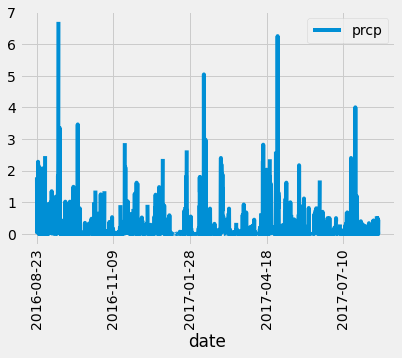

In [65]:
# prcp.set_index(prcp['date1'], inplace=True)
# prcp

# Sort the dataframe by date

prcp = prcp.sort_values("date")
prcp

# Use Pandas Plotting with Matplotlib to plot the data

prcp.plot(rot=90)
plt.show()


In [66]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [74]:
# Design a query to calculate the total number stations in the dataset
count = session.query(func.count(Station.station)).all()
print("No. of Stations: ", count[0][0])

No. of Stations:  9


In [82]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

active_stations = session.query(Measurement.station,func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# active_stations

print("############################")
print("Most Active Station: ", active_stations[0][0])
print("############################")
print("Most Active Stations: ", active_stations)

# List the stations and the counts in descending order.
# This is already done above in the order_by

############################
Most Active Station:  USC00519281
############################
Most Active Stations:  [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [83]:
# Using the most active station id from the previous query, calculate 
# the lowest, highest, and average temperature.

temp_output = session.query(Measurement.station,
                               func.min(Measurement.tobs),
                               func.max(Measurement.tobs),  
                               func.avg(Measurement.tobs)).\
            filter(Measurement.station == "USC00519281" ).all()

temp_output


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

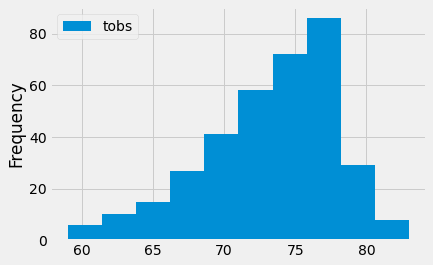

In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


result1 = session.query(Measurement.tobs).filter(Measurement.date >= query_date)\
.filter(Measurement.station == "USC00519281" ).all()

result1

t_DF = pd.DataFrame(result1)
t_DF

t_DF.plot.hist()

# Close session

In [ ]:
# Close Session
session.close()